In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
assets_dir = '../Assets/'

In [35]:
def log_function(x, y, sigma):
    r_squared = x**2 + y**2
    return -(1 / (np.pi * sigma**4)) * (1 - r_squared / (2 * sigma**2)) * np.exp(-r_squared / (2 * sigma**2))

In [36]:
def generate_log_kernel(sigma):
    size = 9 * sigma 
    size = int(np.ceil(size))

    if size & 1 == 0:
        size = size + 1
    
    kernel = np.zeros((size, size))
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = log_function(x, y, sigma)
    return kernel

In [37]:
def simple_zero_crossing(log_image, threshold=50):
    h, w = log_image.shape
    edge_map = np.zeros((h, w), dtype=np.uint8)
    strength_map = np.zeros((h, w), dtype=np.float32)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            n1 = log_image[i-1, j]
            n2 = log_image[i+1, j]
            n3 = log_image[i, j-1]
            n4 = log_image[i, j+1]
            root = log_image[i, j]
            
            if (n1 * n2 < 0) or (n3 * n4 < 0):
                strength = (np.abs(root - n1) + np.abs(root - n2) + 
                           np.abs(root - n3) + np.abs(root - n4))
                strength_map[i, j] = strength
                
                if strength > threshold:
                    edge_map[i, j] = 255
    
    return edge_map, strength_map

In [38]:
lena = cv2.imread(assets_dir + 'generic/Lena.jpg', cv2.IMREAD_GRAYSCALE)

log_kernel = generate_log_kernel(sigma=1)
log_image = cv2.filter2D(lena, ddepth=cv2.CV_32F, kernel=log_kernel).astype(np.float32)

edge_map, strength_map = simple_zero_crossing(log_image, threshold=10)
edge_map_2, strength_map = simple_zero_crossing(log_image, threshold=50)

strength_map = cv2.normalize(strength_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

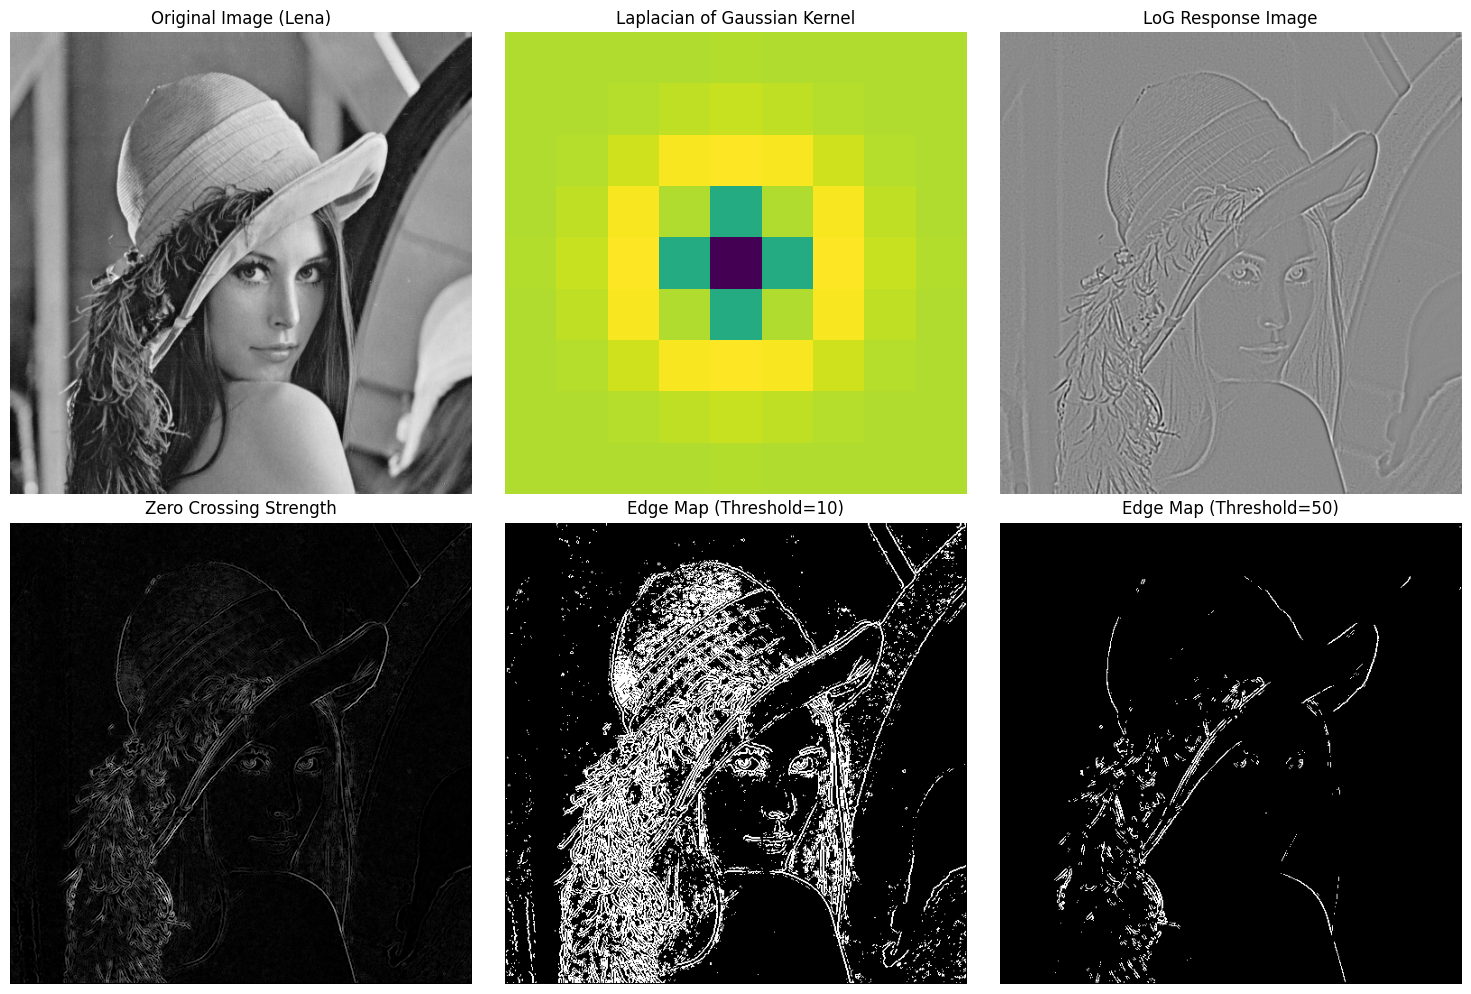

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(lena, cmap='gray')
axs[0, 0].set_title('Original Image (Lena)')
axs[0, 1].imshow(log_kernel)
axs[0, 1].set_title('Laplacian of Gaussian Kernel')
axs[0, 2].imshow(log_image, cmap='gray')
axs[0, 2].set_title('LoG Response Image')

axs[1, 0].imshow(strength_map, cmap='gray')
axs[1, 0].set_title('Zero Crossing Strength')
axs[1, 1].imshow(edge_map, cmap='gray')
axs[1, 1].set_title('Edge Map (Threshold=10)')
axs[1, 2].imshow(edge_map_2, cmap='gray')
axs[1, 2].set_title('Edge Map (Threshold=50)')

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()